In [1]:
import numpy as np

import matplotlib.pyplot as plt

import tqdm

In [2]:
import os

os.chdir("..")

In [3]:
from importlib.machinery import SourceFileLoader

main = SourceFileLoader("main", "src/main.py").load_module()

eq = SourceFileLoader("eq", "src/numerical_equilibria_n_bit_vs_n_bit.py").load_module()

from main import invariant_distribution, invariant_distribution_analytically

def match_payoff(player, coplayer, Sx):
    M = eq.calculate_M_memory_two(player, coplayer)
    ss = invariant_distribution(M)

    return ss @ Sx

In [4]:
import sympy as sym

sym.init_printing(True)

**Against a reactive player, self reactive works**

if  Y is playing a strategy with a memory of N  rounds, while X is playing a strategy with a memory of only 1 round, then by averaging over the resulting probability distribution of all sequences of N outcomes, we can produce an alternative strategy for Y, with a memory of only 1 round, whose long-run average scores against 
X’s strategy are identical.)

In [5]:
p_1, p_2, p_3, p_4 = sym.symbols("p_1, p_2, p_3, p_4")

q_1, q_2 = sym.symbols("q_1, q_2")

In [6]:
p = (p_1, p_1, p_2, p_2)

q = (q_1, q_2, q_1, q_2)

In [7]:
M = main.calculate_M(q, p, analytical=True)

In [8]:
ss = invariant_distribution_analytically(M)

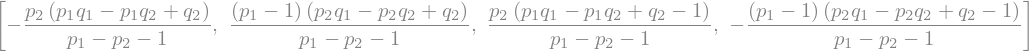

In [9]:
[s.factor() for s in ss]

In [41]:
x = ss[0]

In [50]:
((- x + y) - ss[2]).factor()

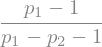

In [57]:
l 

In [47]:
y = (ss[0] + ss[2]).simplify()

In [51]:
z = ss[1]

In [55]:
l = (ss[1] + ss[3]).factor()

In [59]:
((-z + l) - ss[3]).factor()

In [ ]:
(ss[1] + ss[2]).factor()

In [9]:
x = ss[0].factor() + ss[1].factor()

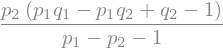

In [10]:
ss[1].factor()

In [11]:
y = ss[2].factor() + ss[3].factor()

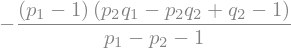

In [12]:
ss[3].factor()

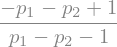

In [13]:
(x - y).simplify()

**Numerical Example**

In [5]:
for i in range(10 ** 3):
    
    np.random.seed(i)
    
    # a random reactive strategy
    q_val = np.random.random(2)
    
    # a random memory one strategy
    p_val = np.random.random(4)
    
    # invariant distribution v
    
    M = main.calculate_M(np.concatenate((q_val, q_val)), p_val, analytical=False)

    ss = invariant_distribution(M)
    
    # equations for self reactive

    p1 = (ss[0] * p_val[0] + ss[2] * p_val[1]) / (ss[0] + ss[2])

    p2 = (ss[1] * p_val[2] + ss[3] * p_val[3]) / (ss[1] + ss[3])

    # new invariant 
    
    M2 = main.calculate_M(np.concatenate((q_val, q_val)), [p1, p1, p2, p2], analytical=False)

    ss2 = invariant_distribution(M2)
    
    # compare them

    assert np.isclose(ss2, ss).all()

In [72]:
q_val = [0, 1, 0, 1]

p_val = [1, 0, 1, 1]

In [73]:
M = main.calculate_M(q_val, p_val, analytical=False)

In [74]:
ss = invariant_distribution(M)

In [75]:
ss

array([ 0.33333333, -0.        ,  0.33333333,  0.33333333])

In [76]:
p1 = (ss[0] * p_val[0] + ss[2] * p_val[1]) / (ss[0] + ss[2])

p2 = (ss[1] * p_val[2] + ss[3] * p_val[3]) / (ss[1] + ss[3])

In [77]:
p1, p2

In [78]:
M2 = main.calculate_M(q_val, [p1, p1, p2, p2], analytical=False)

In [79]:
ss2 = invariant_distribution(M2)

In [80]:
ss2

array([0.33333333, 0.        , 0.33333333, 0.33333333])

### Two bits

#### The Press and Dyson way

In [6]:
cc = [0, 2, 8, 10]

cd = [1, 3, 9, 11]

dc = [4, 6, 12, 14]

dd = [5, 7, 13, 15]

cc_player = [0, 1, 4, 5]

cd_player = [2, 3, 6, 7]

dc_player = [8, 9, 12, 13]

dd_player = [10, 11, 14, 15]

In [10]:
# b, c = 3, 1

r, s, t, p = 3, 0, 5, 1

for i in range(2, 10 ** 3):
    
    np.random.seed(i)
    
    # a random reactive strategy
    q_1val, q_2val, q_3val, q_4val = np.random.random(4)
    
    q_player = [q_1val, q_2val, q_1val, q_2val,  q_3val, q_4val,  q_3val, q_4val,
                q_1val, q_2val, q_1val, q_2val,  q_3val, q_4val,  q_3val, q_4val]
    
    # a random memory one strategy
    player = np.random.random(16)
    
    
    # invariant distribution v
    
    M = eq.calculate_M_memory_two(q_player, player, analytical=False)

    ss = invariant_distribution(M)
    
    # equations for self reactive

    p1 = sum([ss[j] * player[l] for j, l in zip(cc, cc_player)]) / sum([ss[j] for j in cc])

    p2 = sum([ss[j] * player[l] for j, l in zip(cd, cd_player)]) / sum([ss[j] for j in cd])
    
    p3 = sum([ss[j] * player[l] for j, l in zip(dc, dc_player)]) / sum([ss[j] for j in dc])

    p4 = sum([ss[j] * player[l] for j, l in zip(dd, dd_player)]) / sum([ss[j] for j in dd])


    # new invariant 
    
    M2 = eq.calculate_M_memory_two(q_player,
                                   [p1, p1, p2, p2, p1, p1, p2, p2, 
                                    p3, p3, p4, p4, p3, p3, p4, p4],
                                   analytical=False)

    ss2 = invariant_distribution(M2)
    
    # compare them

    assert np.isclose(ss2 , ss).all()

AssertionError: 

In [11]:
ss2, ss

(array([0.02989432, 0.04541827, 0.03097647, 0.051363  , 0.01560506,
        0.01925444, 0.08323528, 0.08268561, 0.06989519, 0.08292857,
        0.06339721, 0.08132707, 0.04225747, 0.05317912, 0.11993908,
        0.12864384]),
 array([0.03173341, 0.04357918, 0.03297496, 0.04936451, 0.02562964,
        0.00922985, 0.09114901, 0.07477189, 0.06805611, 0.08476766,
        0.06139872, 0.08332556, 0.03223289, 0.0632037 , 0.11202536,
        0.13655756]))

In [12]:
ss2 @ np.array([r, s, t, p] * 4)

In [13]:
ss @ np.array([r, s, t, p] * 4)

#### Our way

In [14]:
cc = [0, 1, 4, 5]

cd = [2, 3, 6, 7]

dc = [8, 9, 12, 13]

dd = [10, 11, 14, 15]

In [15]:
b, c = 3, 1

for i in range(1, 10 ** 3):
  
    np.random.seed(i)
    
    # a random reactive strategy
    q_1val, q_2val, q_3val, q_4val = np.random.random(4)
    
    q_player = [q_1val, q_2val, q_1val, q_2val,  q_3val, q_4val,  q_3val, q_4val,
                q_1val, q_2val, q_1val, q_2val,  q_3val, q_4val,  q_3val, q_4val]
    
    # a random memory one strategy
    p_val = np.random.random(16)
    
    # invariant distribution v
    
    M = eq.calculate_M_memory_two(p_val, q_player, analytical=False)

    ss = invariant_distribution(M)
    
    # equations for self reactive

    p1 = sum([ss[j] * p_val[j] for j in cc]) / sum([ss[j] for j in cc])

    p2 = sum([ss[j] * p_val[j] for j in cd]) / sum([ss[j] for j in cd])
    
    p3 = sum([ss[j] * p_val[j] for j in dc]) / sum([ss[j] for j in dc])

    p4 = sum([ss[j] * p_val[j] for j in dd]) / sum([ss[j] for j in dd])


    # new invariant 
    
    M2 = eq.calculate_M_memory_two([p1, p1, p2, p2, p1, p1, p2, p2, 
                                    p3, p3, p4, p4, p3, p3, p4, p4],
                                   q_player,
                                   analytical=False)

    ss2 = invariant_distribution(M2)
    
    # compare them

    assert np.isclose(ss @ np.array([b - c, -c, b, 0] * 4), ss2 @ np.array([b - c, -c, b, 0] * 4)).all()

#### Further checks with conditions


1. $u^{p}(cc)$ = $u^{p'}(cc)$ 

2. $u^{p}(cd)$ = $u^{p'}(cd)$ 

3. $u^{p}(dc)$ = $u^{p'}(dc)$

4. $u^{p}(dd)$ = $u^{p'}(dd)$ 

In [24]:
b, c = 3, 1

for i in range(1, 10 ** 3):
  
    np.random.seed(i)
    
    # a random reactive strategy
    q_1val, q_2val, q_3val, q_4val = np.random.random(4)
    
    q_player = [q_1val, q_2val, q_1val, q_2val,  q_3val, q_4val,  q_3val, q_4val,
                q_1val, q_2val, q_1val, q_2val,  q_3val, q_4val,  q_3val, q_4val]
    
    # a random memory one strategy
    p_val = np.random.random(16)
    
    # invariant distribution v
    
    M = eq.calculate_M_memory_two(p_val, q_player, analytical=False)

    ss = invariant_distribution(M)
    
    # equations for self reactive

    p1 = sum([ss[j] * p_val[j] for j in cc]) / sum([ss[j] for j in cc])

    p2 = sum([ss[j] * p_val[j] for j in cd]) / sum([ss[j] for j in cd])
    
    p3 = sum([ss[j] * p_val[j] for j in dc]) / sum([ss[j] for j in dc])

    p4 = sum([ss[j] * p_val[j] for j in dd]) / sum([ss[j] for j in dd])


    # new invariant 
    
    M2 = eq.calculate_M_memory_two([p1, p1, p2, p2, p1, p1, p2, p2, 
                                    p3, p3, p4, p4, p3, p3, p4, p4],
                                   q_player,
                                   analytical=False)

    ss2 = invariant_distribution(M2)
    
    assert np.isclose(sum([ss2[i] for i in cc]), sum([ss[i] for i in cc]))

    assert np.isclose(sum([ss2[i] for i in cd]), sum([ss[i] for i in cd]))

    assert np.isclose(sum([ss2[i] for i in dc]), sum([ss[i] for i in dc]))

    assert np.isclose(sum([ss2[i] for i in dd]), sum([ss[i] for i in dd]))

### Tit For Two Tats (maybe)

In [90]:
TF2T = [1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0]

In [91]:
np.random.seed(10)

oplayer = np.random.random(16).round(3)

In [92]:
M = eq.calculate_M_memory_two(oplayer, TF2T, analytical=False)

ss = invariant_distribution(M)

**Akin's case**

Condition for reactive is the following:

$p_2 < 1 - \frac{c}{b}$

In [12]:
b, c = sym.symbols("b, c")

In [13]:
to_check = [[0 for _ in range(4)], [1 for _ in range(4)], [0, 0, 1, 1], [1, 1, 0, 0]]

In [14]:
q = [1, q_2, 1, q_2]

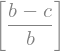

In [18]:
M = main.calculate_M(to_check[0], q, analytical=True)

ss = invariant_distribution_analytically(M)

sym.solve((sum(ss @ np.array([b - c, -c, b, 0])) - (b - c)), q_2)

In [20]:
sum(ss @ np.array([b - c, -c, b, 0]))

In [16]:
M = main.calculate_M(to_check[1], q, analytical=True)

ss = invariant_distribution_analytically(M)

sym.solve((sum(ss @ np.array([b - c, -c, b, 0])) - (b - c)), q_2)

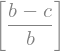

In [21]:
M = main.calculate_M(to_check[2], q, analytical=True)

ss = invariant_distribution_analytically(M)

sym.solve((sum(ss @ np.array([b - c, -c, b, 0])) - (b - c)), q_2)

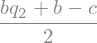

In [24]:
sum(ss @ np.array([b - c, -c, b, 0])).factor()

In [156]:
# M = main.calculate_M(to_check[3], q, analytical=True)

# ss = invariant_distribution_analytically(M)

# sym.solve((sum(ss @ np.array([b - c, -c, b, 0])) - (b - c)), q_2)

**Investigating similarities**

In [25]:
M = main.calculate_M(to_check[0], q, analytical=True)

ss1 = invariant_distribution_analytically(M)

ss1

In [26]:
M = main.calculate_M(to_check[2], q, analytical=True)

ss2 = invariant_distribution_analytically(M)

# ss2 = [s.factor() for s in ss]

In [27]:
alld = sum(ss1 @ np.array([b - c, -c, b, 0]))

atft = sum(ss2 @ np.array([b - c, -c, b, 0]))

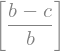

In [28]:
sym.solve((sum(ss2 @ np.array([b - c, -c, b, 0]) - (b - c)).simplify()).factor(), q_2)

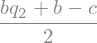

In [29]:
sum(ss2 @ np.array([b - c, -c, b, 0])).factor()

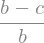

In [30]:
sym.solve(alld - (b - c), q_2)[0].factor()

**Plotting**

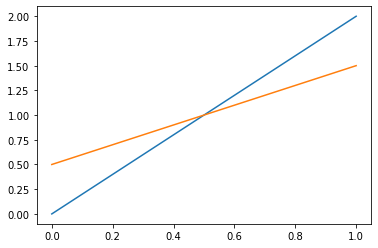

In [31]:
plt.plot(np.linspace(0, 1, 100),
         [alld.subs({b:2, c:1, q_2: q_val}) for q_val in np.linspace(0, 1, 100)]);

plt.plot(np.linspace(0, 1, 100),
         [atft.subs({b:2, c:1, q_2: q_val}) for q_val in np.linspace(0, 1, 100)]);

In [164]:
M = main.calculate_M(to_check[1], q, analytical=True)

ss1 = invariant_distribution_analytically(M)

In [165]:
M = main.calculate_M(to_check[3], q, analytical=True)

ss2 = invariant_distribution_analytically(M)

KeyError: b_4

In [166]:
tft = sum(ss1 @ np.array([b - c, -c, b, 0]))

allc = sum(ss2 @ np.array([b - c, -c, b, 0]))

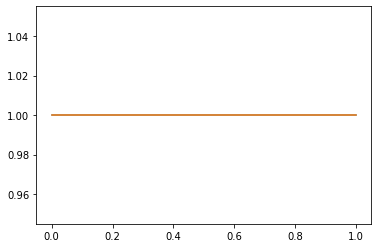

In [149]:
plt.plot(np.linspace(0, 1, 100),
         [tft.subs({b:2, c:1, q_2: q_val}) for q_val in np.linspace(0, 1, 100)]);

plt.plot(np.linspace(0, 1, 100),
         [allc.subs({b:2, c:1, q_2: q_val}) for q_val in np.linspace(0, 1, 100)]);

**Two bits**

In [32]:
import itertools

In [33]:
p_2, p_3, p_4 = sym.symbols("p_2, p_3, p_4")

p_1 = 1

b, c = sym.symbols("b, c")

player = [p_1, p_2, p_1, p_2, p_3, p_4, p_3, p_4,
          p_1, p_2, p_1, p_2, p_3, p_4, p_3, p_4]

In [34]:
to_check_twob = []

for (i, j, l, k) in itertools.product([0, 1], repeat=4):
    
    to_check_twob.append([i, i, j, j, i, i, j, j, l, l, k, k, l, l, k, k])
    

In [35]:
len(to_check_twob)

In [38]:
to_check_twob

In [74]:
payoffs = []

for check in to_check_twob:
    
    try:
        M = eq.calculate_M_memory_two(check, player, analytical=True)

        ss = invariant_distribution_analytically(M)
        print(ss)

        payoffs.append(sum(ss @ np.array([b - c, -c, b, 0] * 4)).factor())
        
        
    except KeyError:
        payoffs.append("N")

Matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, p_4**2, p_4*(1 - p_4), 0, 0, p_4*(1 - p_4), p_4**2 - 2*p_4 + 1]])
Matrix([[0, 0, p_3*p_4/3, p_4*(1 - p_3)/3, 0, 0, p_3*(1 - p_4)/3, p_3*p_4/3 - p_3/3 - p_4/3 + 1/3, p_2*p_4/3, p_2*(1 - p_4)/3, p_2*p_3/3, p_3*(1 - p_2)/3, p_4*(1 - p_2)/3, p_2*p_4/3 - p_2/3 - p_4/3 + 1/3, p_2*(1 - p_3)/3, p_2*p_3/3 - p_2/3 - p_3/3 + 1/3]])
Matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, p_4**2, p_4*(1 - p_4), 0, 0, p_4*(1 - p_4), p_4**2 - 2*p_4 + 1]])
Matrix([[p_3*p_4/4, p_4*(1 - p_3)/4, p_3/4, 0, p_3*(1 - p_4)/4, p_3*p_4/4 - p_3/4 - p_4/4 + 1/4, 1/4 - p_3/4, 0, p_2*p_4/4, p_2*(1 - p_4)/4, p_2/4, 1/4 - p_2/4, p_4*(1 - p_2)/4, p_2*p_4/4 - p_2/4 - p_4/4 + 1/4, 0, 0]])
Matrix([[0, 0, p_2*p_3/2, p_2*(1 - p_3)/2, 0, 0, p_3*(1 - p_2)/2, p_2*p_3/2 - p_2/2 - p_3/2 + 1/2, p_2*p_3/2, p_3*(1 - p_2)/2, 0, 0, p_2*(1 - p_3)/2, p_2*p_3/2 - p_2/2 - p_3/2 + 1/2, 0, 0]])
Matrix([[p_2*p_3/3, p_2*(1 - p_3)/3, p_3/3, 0, p_3*(1 - p_2)/3, p_2*p_3/3 - p_2/3 - p_3/3 + 1/3, 1/3 - p_3/3, 0, p_2/3, 1/3

In [70]:
M = eq.calculate_M_memory_two(to_check_twob[5], player, analytical=True)

In [71]:
ss = invariant_distribution_analytically(M)

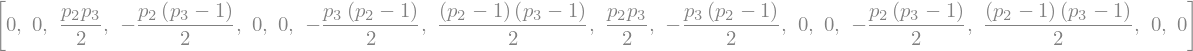

In [73]:
[i.factor() for i in ss]

In [48]:
payoffs[0]

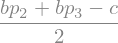

In [49]:
payoffs[5].factor()

In [50]:
payoffs[10]

'N'

In [51]:
payoffs[15]

In [68]:
payoffs[8]

'N'

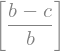

In [191]:
sym.solve(sum(ss @ np.array([b - c, -c, b, 0] * 4)).factor() - (b - c), p_4)

In [192]:
M = eq.calculate_M_memory_two(to_check_twob[-1], player, analytical=True)

ss = invariant_distribution_analytically(M)

In [193]:
sym.solve(sum(ss @ np.array([b - c, -c, b, 0] * 4)).factor() - (b - c), p_4)